<h1 style="font-family:copperplate;">LAPTOP PRICE PREDICTOR</h1>
<b>"This model provides laptop price estimates based on the specific features selected by the user according to their wishlist, such as brand, type, CPU, RAM, GPU, operating system, weight, IPS/touchscreen functionality, and screen resolution."</b>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("/content/drive/MyDrive/adverk AI/laptop_data.csv")
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [7]:
df.isnull().sum()

,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0
Weight,0


In [8]:
df.duplicated().sum()

29

In [9]:
df['Ram']=df["Ram"].str.replace("GB","")
df['Weight']=df["Weight"].str.replace("kg","")
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200


In [10]:
df['Ram']=df["Ram"].astype("int")
df['Weight']=df["Weight"].astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 112.1+ KB


In [11]:
df['Price'].value_counts()

,count
Price,
79866.72,14
58554.72,14
95850.72,14
47898.72,11
63882.72,11
...,...
111355.20,1
16197.12,1
40439.52,1


<b>Number of laptops in respective price ranges</b>

<Axes: xlabel='Price', ylabel='Count'>

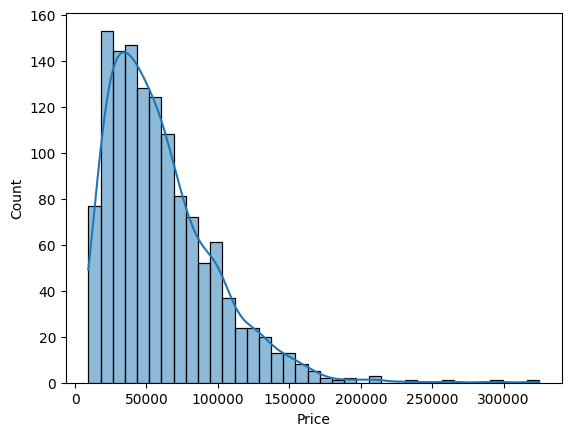

In [12]:
sns.histplot(df['Price'],kde=True)

In [13]:
# Exploratory Data Analysis(EDA)
# Univariate Analysis
# Bivariate Analysis
df['Company'].value_counts()

,count
Company,
Dell,297
Lenovo,297
HP,274
Asus,158
Acer,103
MSI,54
Toshiba,48
Apple,21
Samsung,9


<b>Number of laptops of different conpanies</b>

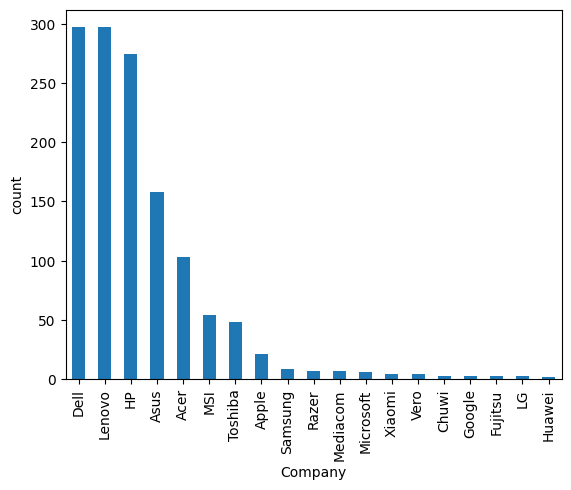

In [14]:
df['Company'].value_counts().plot(kind='bar')
plt.ylabel("count")
plt.show()

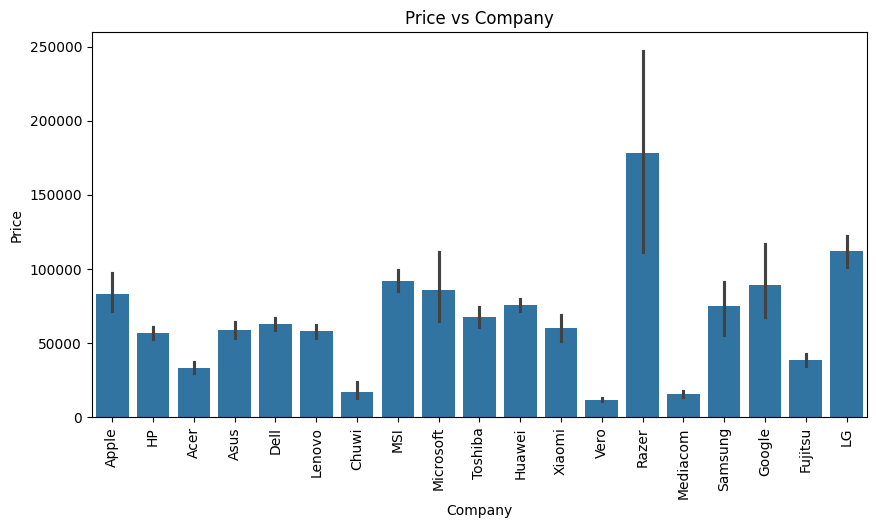

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.title("Price vs Company")
plt.show()

In [16]:
df['TypeName']

,TypeName
0,Ultrabook
1,Ultrabook
2,Notebook
3,Ultrabook
4,Ultrabook
...,...
1298,2 in 1 Convertible
1299,2 in 1 Convertible
1300,Notebook
1301,Notebook


<b>Number of laptops of different type names</b>

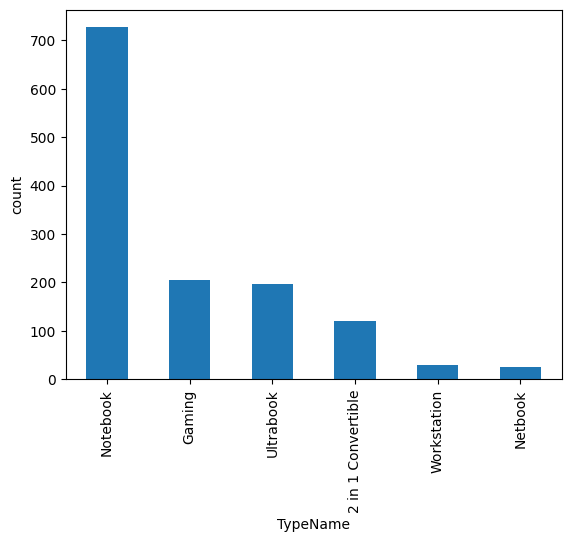

In [17]:
df['TypeName'].value_counts().plot(kind='bar')
plt.ylabel("count")
plt.show()

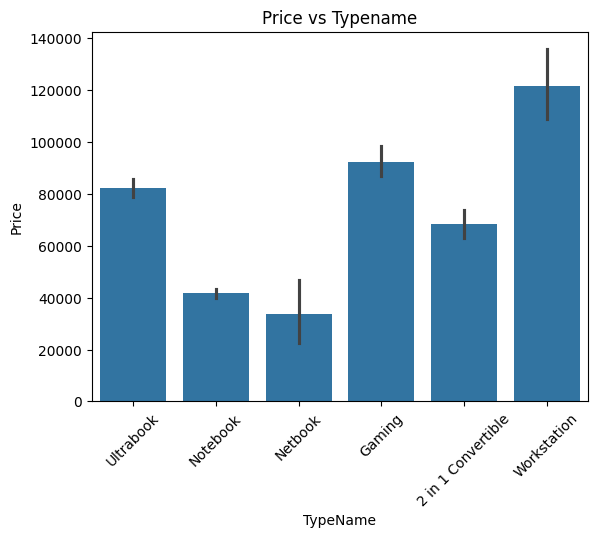

In [18]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation=45)
plt.title("Price vs Typename")
plt.show()

<b>Number of laptops of different inches</b>

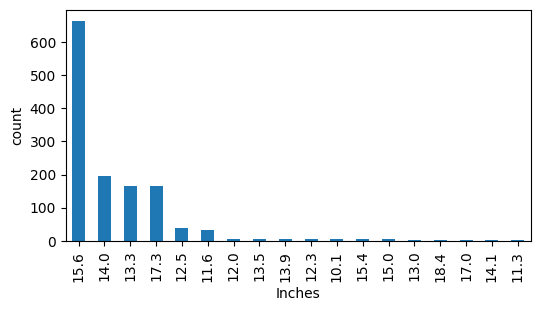

In [19]:
plt.figure(figsize=(6,3))
df['Inches'].value_counts().plot(kind='bar')
plt.ylabel("count")
plt.show()

<Figure size 600x400 with 0 Axes>

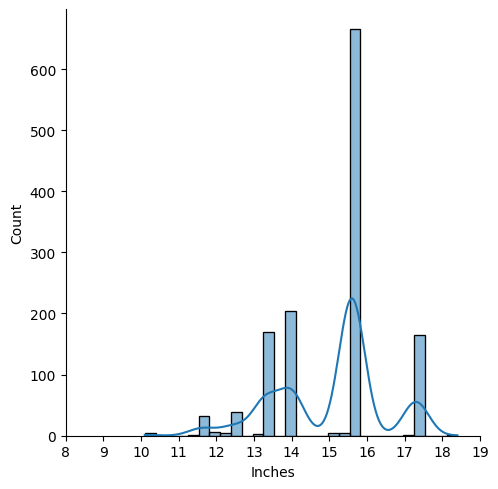

In [20]:
plt.figure(figsize=(6,4))
sns.displot(df['Inches'],kde=True)
plt.xticks(np.arange(8,20,1))
plt.show()

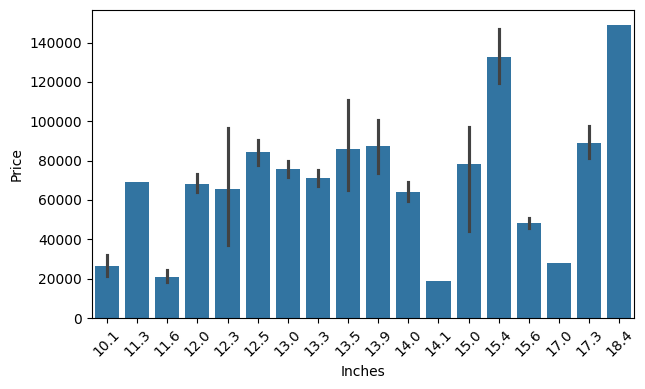

In [21]:
plt.figure(figsize=(7,4))
sns.barplot(x=df['Inches'],y=df['Price'])
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Inches', ylabel='Price'>

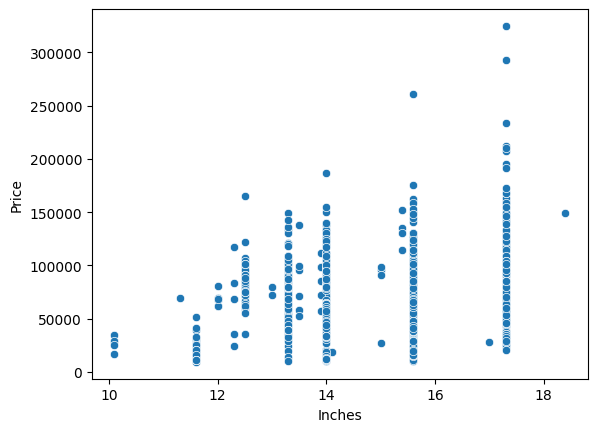

In [22]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [23]:
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,507
1366x768,281
IPS Panel Full HD 1920x1080,230
IPS Panel Full HD / Touchscreen 1920x1080,53
Full HD / Touchscreen 1920x1080,47
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


In [24]:
df['X_res']=df['ScreenResolution'].apply(lambda a:a.split()[-1].split('x')[0]).astype('int')

In [25]:
df['Y_res']=df['ScreenResolution'].apply(lambda a:a.split()[-1].split('x')[1]).astype('int')

In [26]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,2560,1600


In [27]:
df['IPS']=df['ScreenResolution'].apply(lambda b:1 if 'IPS' in b else 0)

In [28]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda b:1 if 'Touchscreen' in b else 0)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  X_res             1303 non-null   int64  
 12  Y_res             1303 non-null   int64  
 13  IPS               1303 non-null   int64  
 14  Touchscreen       1303 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 152.8+ KB


In [30]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,IPS,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560,1600,1,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440,900,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1920,1080,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,2880,1800,1,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,2560,1600,1,0


In [31]:
df['PPI']=np.sqrt((df['X_res']**2)+(df['Y_res']**2))/df['Inches']

In [32]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,IPS,Touchscreen,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560,1600,1,0,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440,900,0,0,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1920,1080,0,0,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,2880,1800,1,0,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,2560,1600,1,0,226.983005


In [33]:
df.drop(columns=['X_res','Y_res','Inches'],inplace=True)

In [34]:
df.head()

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen,PPI
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,226.983005
1,Apple,Ultrabook,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,220.534624
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,226.983005


<b>Number of laptops of different PPI</b>

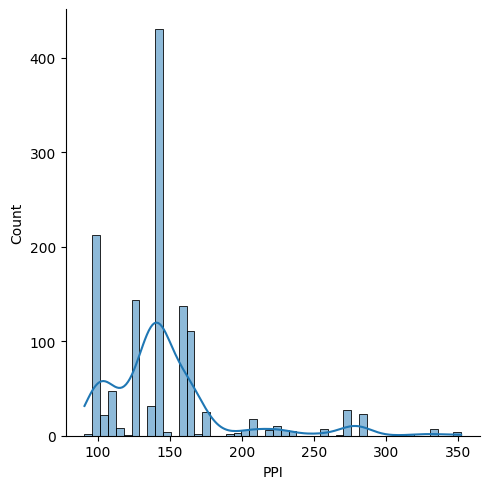

In [35]:
sns.displot(df['PPI'],kde=True)
plt.show()

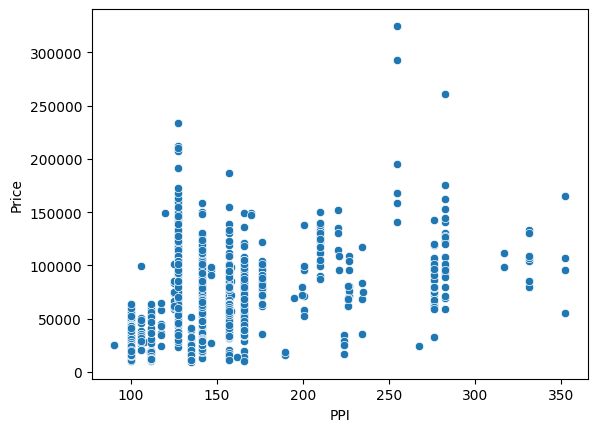

In [36]:
sns.scatterplot(x=df['PPI'],y=df['Price'])
plt.show()

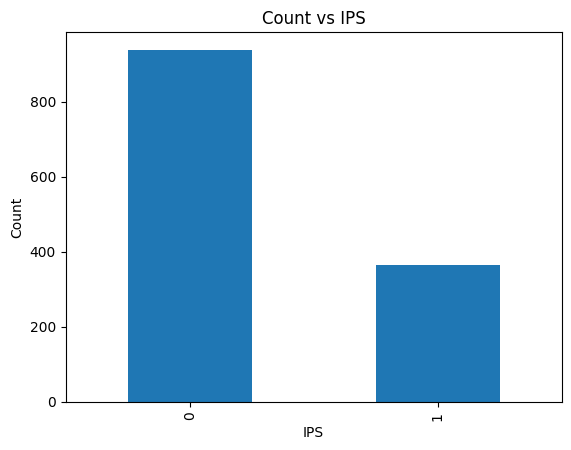

In [37]:
df['IPS'].value_counts().plot(kind='bar')
plt.title("Count vs IPS")
plt.ylabel("Count")
plt.show()

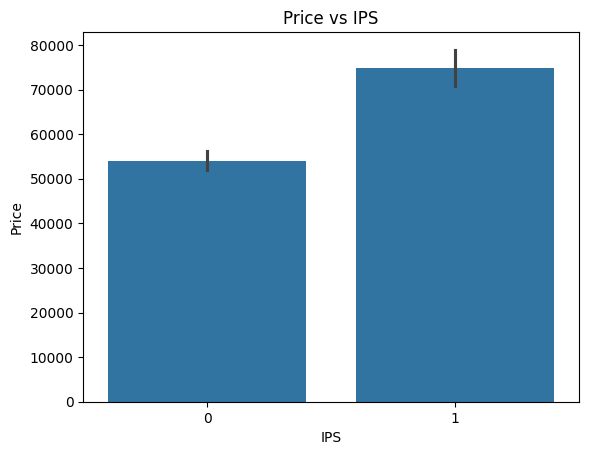

In [38]:

sns.barplot(x=df['IPS'],y=df['Price'])
plt.title("Price vs IPS")
plt.show()

In [39]:
df['Touchscreen'].value_counts()

,count
Touchscreen,
0,1111
1,192


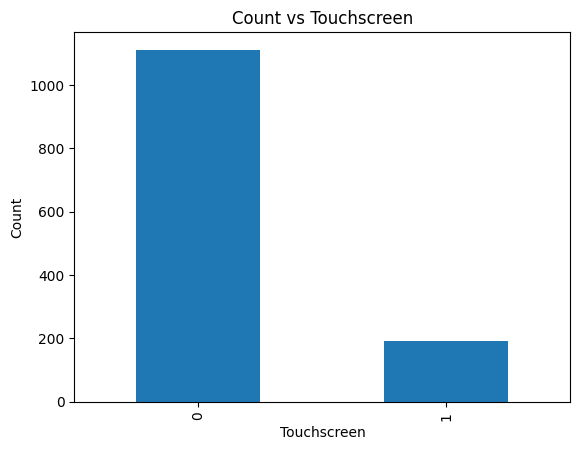

In [40]:
df['Touchscreen'].value_counts().plot(kind='bar')
plt.ylabel("Count")
plt.title("Count vs Touchscreen")
plt.show()

Text(0.5, 1.0, 'Price vs Touchscreen')

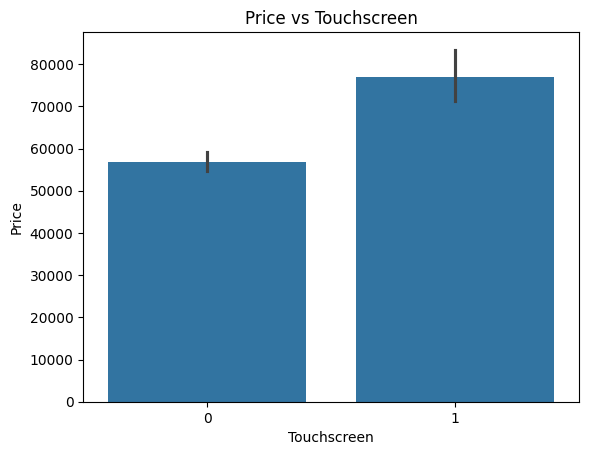

In [41]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])
plt.title("Price vs Touchscreen")

In [42]:
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,190
Intel Core i7 7700HQ 2.8GHz,146
Intel Core i7 7500U 2.7GHz,134
Intel Core i7 8550U 1.8GHz,73
Intel Core i5 8250U 1.6GHz,72
...,...
Intel Core M M3-6Y30 0.9GHz,1
AMD A9-Series 9420 2.9GHz,1
Intel Core i3 6006U 2.2GHz,1


In [43]:
df['Cpu']=df['Cpu'].apply(lambda a:" ".join(a.split()[0:3]))

In [44]:
df=df[df['Cpu']!='Samsung Cortex A72&A53']

In [45]:
df['Cpu']

,Cpu
0,Intel Core i5
1,Intel Core i5
2,Intel Core i5
3,Intel Core i7
4,Intel Core i5
...,...
1298,Intel Core i7
1299,Intel Core i7
1300,Intel Celeron Dual
1301,Intel Core i7


In [46]:
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i7,527
Intel Core i5,423
Intel Core i3,136
Intel Celeron Dual,80
Intel Pentium Quad,27
Intel Core M,19
AMD A9-Series 9420,12
Intel Celeron Quad,8
AMD A6-Series 9220,8


In [47]:
def fetch_processor(text):
  if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3':
    return text
  elif text=="Intel Celeron Dual":
    return 'intel Celeron Dual core'
  else:
    if text.split()[0]=='Intel':
      return 'other intel processor'
    else:
      return 'other AMD processors'

In [48]:
df['Cpu'].apply(fetch_processor).value_counts()

,count
Cpu,
Intel Core i7,527
Intel Core i5,423
Intel Core i3,136
intel Celeron Dual core,80
other intel processor,74
other AMD processors,62


In [49]:
df.loc[:,'Cpu']=df['Cpu'].apply(fetch_processor)

In [50]:
df.head()

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen,PPI
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,226.983005
1,Apple,Ultrabook,1440x900,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Full HD 1920x1080,Intel Core i5,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,220.534624
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,226.983005


<b>Number of Laptops of different CPU</b>

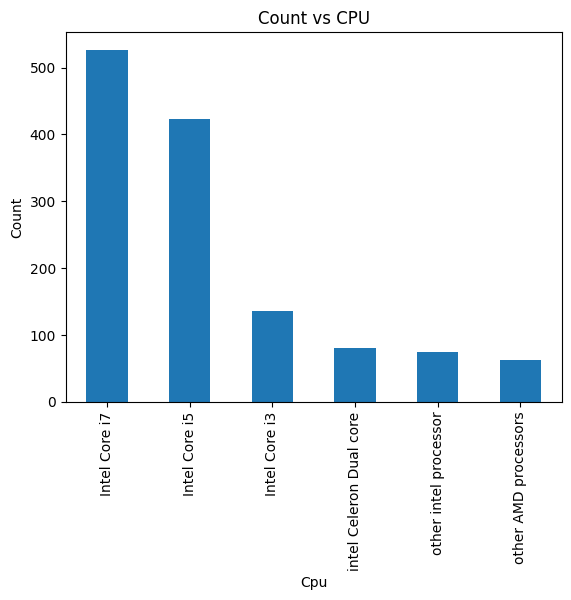

In [51]:
df['Cpu'].value_counts().plot(kind='bar')
plt.ylabel("Count")
plt.title("Count vs CPU")
plt.show()


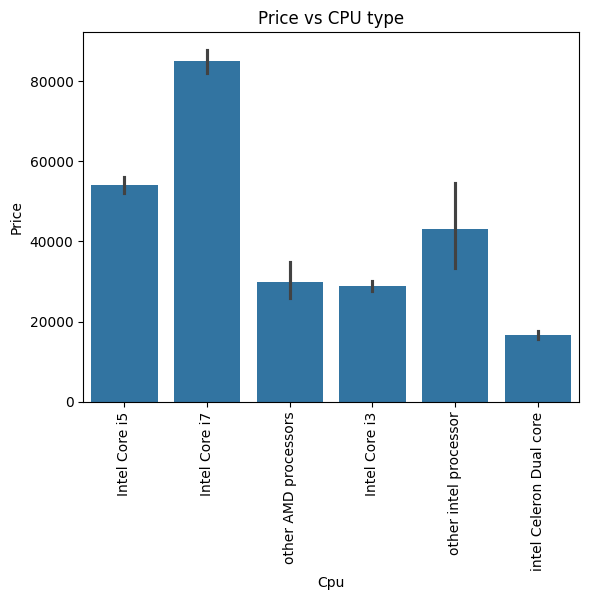

In [52]:
sns.barplot(x=df['Cpu'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.title("Price vs CPU type")
plt.show()

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1302 non-null   object 
 1   TypeName          1302 non-null   object 
 2   ScreenResolution  1302 non-null   object 
 3   Cpu               1302 non-null   object 
 4   Ram               1302 non-null   int64  
 5   Memory            1302 non-null   object 
 6   Gpu               1302 non-null   object 
 7   OpSys             1302 non-null   object 
 8   Weight            1302 non-null   float64
 9   Price             1302 non-null   float64
 10  IPS               1302 non-null   int64  
 11  Touchscreen       1302 non-null   int64  
 12  PPI               1302 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 142.4+ KB


<b>Number of laptops of different ram types</b>

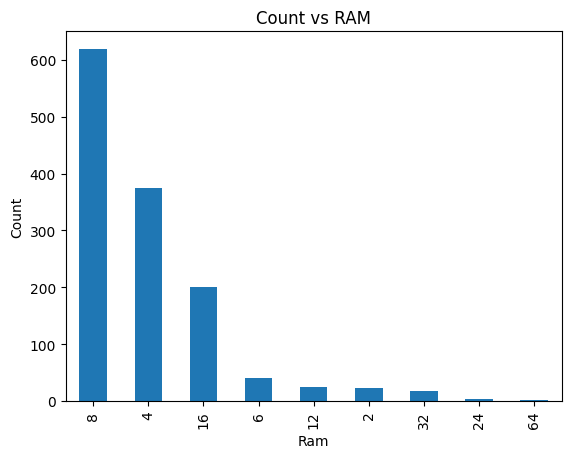

In [54]:
df['Ram'].value_counts().plot(kind='bar')
plt.ylabel("Count")
plt.title("Count vs RAM")
plt.show()

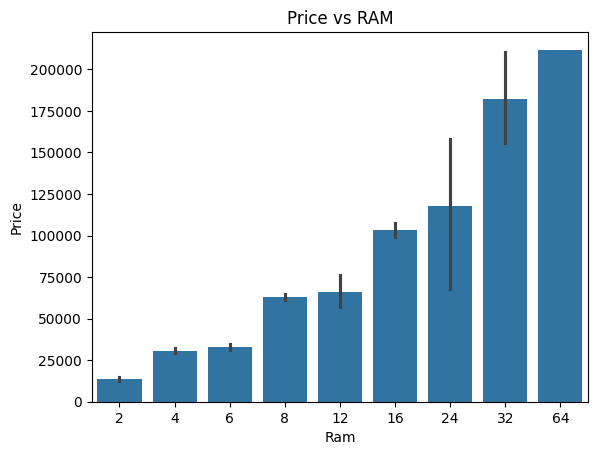

In [55]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.title("Price vs RAM")
plt.show()

In [56]:
df['Memory'].value_counts()

,count
Memory,
256GB SSD,412
1TB HDD,223
500GB HDD,132
512GB SSD,118
128GB SSD + 1TB HDD,94
128GB SSD,76
256GB SSD + 1TB HDD,73
32GB Flash Storage,37
2TB HDD,16


In [57]:
df['Gpu'].apply(lambda x:x.split()[0]).value_counts()

,count
Gpu,
Intel,722
Nvidia,400
AMD,180


In [58]:
df.loc[:, 'Gpu'] = df['Gpu'].apply(lambda x: x.split()[0])


In [59]:
df

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen,PPI
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5,8,128GB SSD,Intel,macOS,1.37,71378.6832,1,0,226.983005
1,Apple,Ultrabook,1440x900,Intel Core i5,8,128GB Flash Storage,Intel,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Full HD 1920x1080,Intel Core i5,8,256GB SSD,Intel,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7,16,512GB SSD,AMD,macOS,1.83,135195.3360,1,0,220.534624
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5,8,256GB SSD,Intel,macOS,1.37,96095.8080,1,0,226.983005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7,4,128GB SSD,Intel,Windows 10,1.80,33992.6400,1,1,157.350512
1299,Lenovo,2 in 1 Convertible,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7,16,512GB SSD,Intel,Windows 10,1.30,79866.7200,1,1,276.053530
1300,Lenovo,Notebook,1366x768,intel Celeron Dual core,2,64GB Flash Storage,Intel,Windows 10,1.50,12201.1200,0,0,111.935204
1301,HP,Notebook,1366x768,Intel Core i7,6,1TB HDD,AMD,Windows 10,2.19,40705.9200,0,0,100.454670


<b>Number of laptops of different GPU types<b>

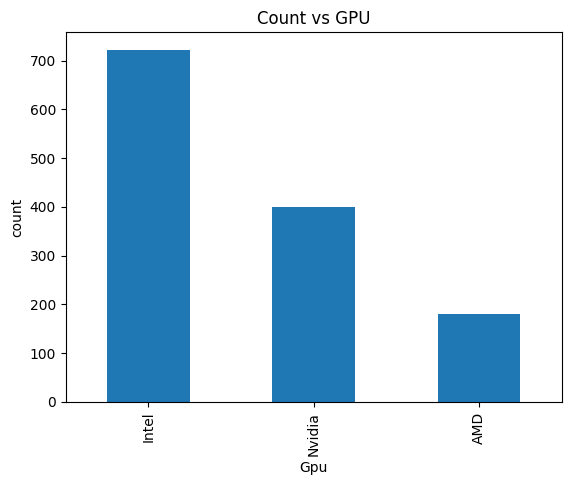

In [60]:
df['Gpu'].value_counts().plot(kind='bar')
plt.ylabel("count")
plt.title("Count vs GPU")
plt.show()

In [61]:
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,1072
No OS,66
Linux,62
Windows 7,45
Chrome OS,26
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


In [62]:
def operatingsys(inp):
  if inp=='Windows 10' or inp=='Windows 7' or inp=='Windows 10 S':
    return 'Windows'
  elif inp=='macOS' or inp=='Mac OS X':
    return 'MAC'
  else:
    return 'Linux/chrome OS/No OS'


In [63]:
df.loc[:,'OpSys']=df['OpSys'].apply(operatingsys)

In [64]:
df.head()

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen,PPI
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5,8,128GB SSD,Intel,MAC,1.37,71378.6832,1,0,226.983005
1,Apple,Ultrabook,1440x900,Intel Core i5,8,128GB Flash Storage,Intel,MAC,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Full HD 1920x1080,Intel Core i5,8,256GB SSD,Intel,Linux/chrome OS/No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7,16,512GB SSD,AMD,MAC,1.83,135195.3360,1,0,220.534624
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5,8,256GB SSD,Intel,MAC,1.37,96095.8080,1,0,226.983005


<b>Number of laptops of different operating system</b>

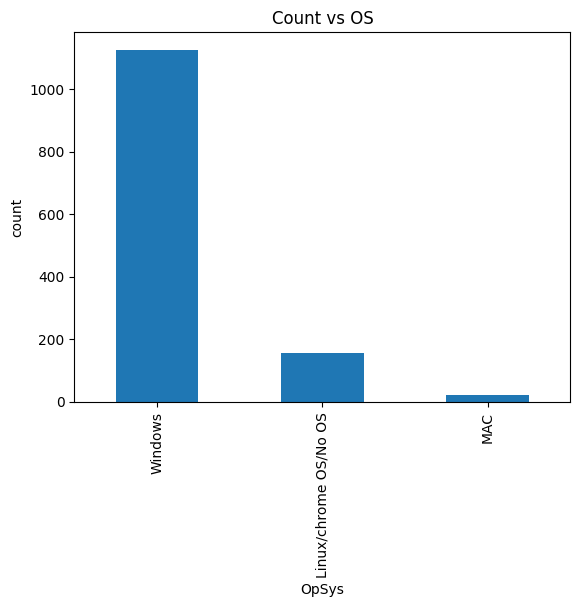

In [65]:
df['OpSys'].value_counts().plot(kind='bar')
plt.ylabel("count")
plt.title("Count vs OS")
plt.show()

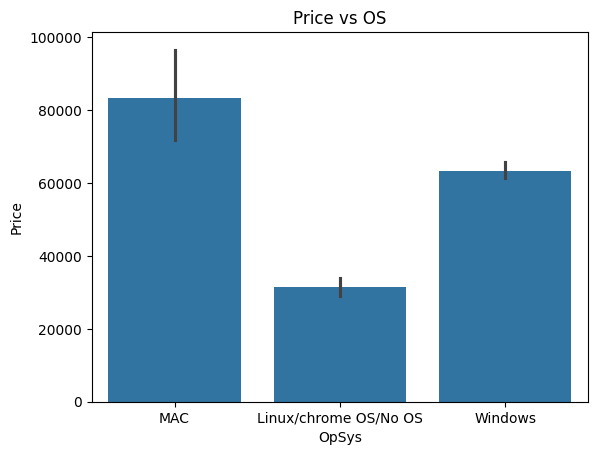

In [66]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.title("Price vs OS")
plt.show()

In [67]:
df['Weight'].value_counts()

,count
Weight,
2.20,126
2.10,58
2.00,45
2.40,44
2.30,41
...,...
4.50,1
1.14,1
3.80,1


<b>Number of laptops of different weights</b>

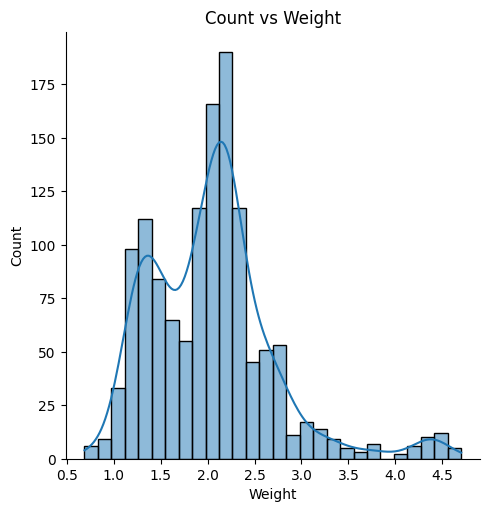

In [68]:
sns.displot(df['Weight'],kde=True)
plt.title("Count vs Weight")
plt.show()

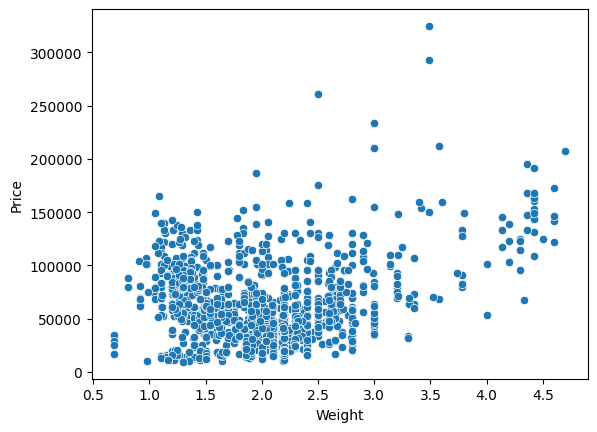

In [69]:
sns.scatterplot(x=df['Weight'],y=df['Price'])
plt.show()

In [70]:
df.head(1)

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen,PPI
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5,8,128GB SSD,Intel,MAC,1.37,71378.6832,1,0,226.983005


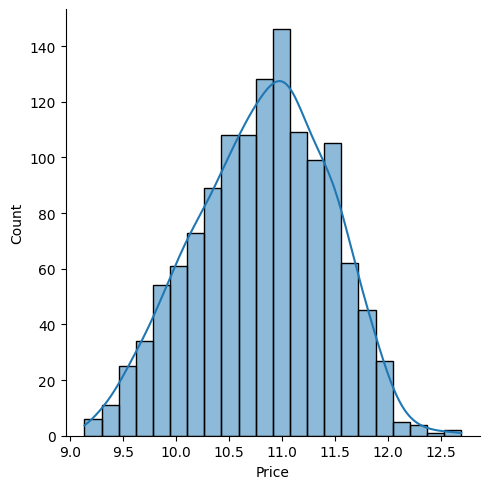

In [71]:
sns.displot(np.log(df['Price']),kde=True)
plt.show()

In [72]:
df.head()

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen,PPI
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5,8,128GB SSD,Intel,MAC,1.37,71378.6832,1,0,226.983005
1,Apple,Ultrabook,1440x900,Intel Core i5,8,128GB Flash Storage,Intel,MAC,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Full HD 1920x1080,Intel Core i5,8,256GB SSD,Intel,Linux/chrome OS/No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7,16,512GB SSD,AMD,MAC,1.83,135195.3360,1,0,220.534624
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5,8,256GB SSD,Intel,MAC,1.37,96095.8080,1,0,226.983005


In [73]:
df=df.drop(columns=['ScreenResolution','Memory'])

In [74]:
df.head()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,IPS,Touchscreen,PPI
0,Apple,Ultrabook,Intel Core i5,8,Intel,MAC,1.37,71378.6832,1,0,226.983005
1,Apple,Ultrabook,Intel Core i5,8,Intel,MAC,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5,8,Intel,Linux/chrome OS/No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7,16,AMD,MAC,1.83,135195.3360,1,0,220.534624
4,Apple,Ultrabook,Intel Core i5,8,Intel,MAC,1.37,96095.8080,1,0,226.983005


In [75]:
X=df.drop(columns=['Price'])
y=np.log(df['Price'])

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=2)

In [78]:
X.shape

(1302, 10)

In [79]:
X_train.shape

(1106, 10)

In [80]:
X_test.shape

(196, 10)

In [81]:
X

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,IPS,Touchscreen,PPI
0,Apple,Ultrabook,Intel Core i5,8,Intel,MAC,1.37,1,0,226.983005
1,Apple,Ultrabook,Intel Core i5,8,Intel,MAC,1.34,0,0,127.677940
2,HP,Notebook,Intel Core i5,8,Intel,Linux/chrome OS/No OS,1.86,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7,16,AMD,MAC,1.83,1,0,220.534624
4,Apple,Ultrabook,Intel Core i5,8,Intel,MAC,1.37,1,0,226.983005
...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,Intel Core i7,4,Intel,Windows,1.80,1,1,157.350512
1299,Lenovo,2 in 1 Convertible,Intel Core i7,16,Intel,Windows,1.30,1,1,276.053530
1300,Lenovo,Notebook,intel Celeron Dual core,2,Intel,Windows,1.50,0,0,111.935204
1301,HP,Notebook,Intel Core i7,6,AMD,Windows,2.19,0,0,100.454670


In [82]:
X_train

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,IPS,Touchscreen,PPI
183,Toshiba,Notebook,Intel Core i5,8,Intel,Windows,2.00,0,0,100.454670
1141,MSI,Gaming,Intel Core i7,8,Nvidia,Windows,2.40,0,0,141.211998
1049,Asus,Netbook,intel Celeron Dual core,4,Intel,Linux/chrome OS/No OS,1.20,0,0,135.094211
1020,Dell,2 in 1 Convertible,Intel Core i3,4,Intel,Windows,2.08,1,1,141.211998
878,Dell,Notebook,Intel Core i5,4,Nvidia,Windows,2.18,0,0,141.211998
...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,Intel Core i3,4,Nvidia,Windows,2.20,0,0,100.454670
299,Asus,Ultrabook,Intel Core i7,16,Nvidia,Windows,1.63,0,0,141.211998
493,Acer,Notebook,other AMD processors,8,AMD,Windows,2.20,0,0,100.454670
527,Lenovo,Notebook,Intel Core i3,8,Nvidia,Linux/chrome OS/No OS,2.20,0,0,100.454670


In [83]:
X_test

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,IPS,Touchscreen,PPI
248,HP,Notebook,Intel Core i5,4,Intel,Windows,1.49,1,0,165.632118
555,Asus,Notebook,intel Celeron Dual core,4,Intel,Linux/chrome OS/No OS,2.00,0,0,100.454670
1251,HP,Notebook,other AMD processors,4,AMD,Windows,1.86,0,0,100.454670
547,Lenovo,Notebook,Intel Core i5,4,Intel,Linux/chrome OS/No OS,2.15,0,0,141.211998
885,HP,2 in 1 Convertible,Intel Core i5,4,Intel,Windows,1.28,0,1,165.632118
...,...,...,...,...,...,...,...,...,...,...
1129,HP,Gaming,Intel Core i5,8,Nvidia,Windows,3.35,1,0,127.335675
172,Lenovo,Notebook,other AMD processors,4,AMD,Linux/chrome OS/No OS,2.20,0,0,100.454670
322,Asus,Notebook,Intel Core i7,8,Intel,Windows,2.00,0,0,157.350512
996,HP,Ultrabook,Intel Core i7,8,Intel,Windows,1.11,1,1,165.632118


In [84]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [85]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [86]:
# Linear Regression
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=LinearRegression()
pipe=Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('R2 score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))

R2 score: 0.8097912205219324
MAE: 0.21477015163119864
MSE: 0.07276458157054498


In [87]:
# Lasso Regression
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=Lasso(alpha=0.001)
pipe=Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('R2 score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))

R2 score: 0.8147147801664865
MAE: 0.21141164039980073
MSE: 0.07088106831549618


In [88]:
# Ridge Regression
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=Ridge(alpha=10)
pipe=Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('R2 score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))

R2 score: 0.8176834635530801
MAE: 0.20929779345771032
MSE: 0.06974539516185067


In [89]:
# KNN Regression
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=KNeighborsRegressor()
pipe=Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('R2 score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))

R2 score: 0.8534845387574124
MAE: 0.18373786794870822
MSE: 0.056049653755133814


In [90]:
#Descision tree regressor
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=DecisionTreeRegressor(max_depth=7)
pipe=Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('R2 score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))

R2 score: 0.8258471708059238
MAE: 0.19566619759970552
MSE: 0.06662235981118171


In [91]:
#RandomForestRegressor
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=RandomForestRegressor()
pipe=Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('R2 score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))


R2 score: 0.8787794782558604
MAE: 0.159453850808888
MSE: 0.04637304632666831


In [92]:
#AdaBoostRegressor
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=AdaBoostRegressor(n_estimators=20)
pipe=Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('R2 score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))


R2 score: 0.7390792753342558
MAE: 0.25228743086150524
MSE: 0.09981551537990624


In [93]:
#GradientBoostingRegressor
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=GradientBoostingRegressor(n_estimators=500)
pipe=Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('R2 score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))

R2 score: 0.869067376921112
MAE: 0.16294073602197362
MSE: 0.05008842156714286


In [94]:
#Support vector machine regression
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=SVR(C=10000)
pipe=Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('R2 score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))

R2 score: 0.8394368523329994
MAE: 0.1935058713138824
MSE: 0.06142361192631537


In [95]:
#XG boost regressor
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=XGBRegressor(n_estimators=45,max_depth=5)
pipe=Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('R2 score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))


R2 score: 0.8760274185492871
MAE: 0.16282211077542183
MSE: 0.04742584984896343


In [96]:
#Random Forest Regressor
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=RandomForestRegressor()
pipe=Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('R2 score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))

R2 score: 0.8785841235134031
MAE: 0.16126312921920444
MSE: 0.0464477795021386


In [97]:
import pickle
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [98]:
%%writefile lappyapp.py
import streamlit as st
html_temp='''
<h1 style="color: yellow;text-align: center;">Laptop Price Predictor</h1>
<div style="background-color: cornflowerblue; color: white; width: 550px; margin: 0 auto;border-radius: 10px; text-align: center; height:130px;">
    <p style="font-weight: bolder">This app is designed to predict the laptop price based on various components.</p>
    <p style="font-weight: bolder">Once the configuration details of the laptop is entered</p>
    <p style="font-weight: bolder">please click on PREDICT to get the estimated price of the laptop.</p>
</div>'''
st.markdown(html_temp,unsafe_allow_html=True)

import numpy as np
import pickle as pkl
pipe=pkl.load(open('pipe.pkl','rb'))
df=pkl.load(open('df.pkl','rb'))

company=st.selectbox("Brand",df['Company'].unique(),index=4)
Laptop_type=st.selectbox("Laptop_Type",df['TypeName'].unique(),index=1)
cpu=st.selectbox("Processor",df['Cpu'].unique())
ram=st.selectbox('RAM(in GB)',[2,4,6,8,12,16,24,32,64,128],index=3)
gpu=st.selectbox('Graphics Card',df['Gpu'].unique(),index=2)
os=st.selectbox('OS',df['OpSys'].unique(),index=2)
weight=st.number_input('Weight of the laptop(in kg)',0.6,4.7,2.2,0.1)
ips=st.selectbox('IPS Display',['No','Yes'])
touchscreen=st.selectbox('Touchscreen',['No','Yes'])
screen_size=st.number_input("Size of the screen(in Inches)",min_value=10.0,max_value=18.5,value=15.0,step=0.1)
resolution=st.selectbox("Screen Resolution",['1920x1080', '1366x768', '3840x2160', '3200x1800', '2560x1440',
       '1600x900', '2560x1600', '2304x1440', '2256x1504', '1920x1200',
       '1440x900', '2880x1800', '2400x1600', '2160x1440', '2736x1824'])

if st.button("PREDICT PRICE"):
  ppi=None
  if touchscreen == 'Yes':
    touchscreen = 1
  else:
    touchscreen = 0
  if ips == 'Yes':
    ips = 1
  else:
    ips = 0
  X_res=int(resolution.split('x')[0])
  Y_res=int(resolution.split('x')[1])
  ppi=((X_res*2)+(Y_res*2))*0.5/screen_size
  query=np.array([[company,Laptop_type,cpu,ram,gpu,os,weight,ips,touchscreen,ppi]])
  op=np.exp(pipe.predict(query))
  st.subheader("The predicted price of the laptop for the above mentioned configuration is:")
  st.subheader("Rs."+str(round(op[0])))

Writing lappyapp.py


In [99]:
! wget -q -O - ipv4.icanhazip.com

34.106.211.89


In [100]:
!pip install streamlit

In [101]:
!streamlit run lappyapp.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.211.89:8501

your url is: https://wide-moons-divide.loca.lt
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
  Stopping...
^C
